### Instructions

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, understanding trends in charging facilities and sales is essential to inform strategic planning.

Does increased electric vehicle sales lead to more public or private charging ports?

- How many vehicles were sold in 2018 in total? Save the answer as a numeric variable called ev_sales_2018.
- Plot trends for private ports, public ports, and sales, saving this as fig, ax objects.
- Did vehicle sales and number of private and public ports show the same trend (either increasing or decreasing) between the years 2015 and 2018? 
- Save your answer as same or different to a variable called **trend**

In [6]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# reading sets and merging
priv = pd.read_csv(r'C:\Users\denku\datacamp\datacamp-projects\Python\Inspecting Electric Vehicle Charging Trends\private_ev_charging.csv') 
public = pd.read_csv(r'C:\Users\denku\datacamp\datacamp-projects\Python\Inspecting Electric Vehicle Charging Trends\public_ev_charging.csv')
sales = pd.read_csv(r'C:\Users\denku\datacamp\datacamp-projects\Python\Inspecting Electric Vehicle Charging Trends\ev_sales.csv')

df_temp = priv.merge(public, on='year', how='outer', indicator=True)
df_temp = df_temp[df_temp['_merge'] == 'both']

df_temp = df_temp.drop(columns=['_merge'])

In [8]:
# finding the total cars sold in 2018
sales_sum = sales.groupby('year')['sales'].sum().reset_index()

# Inspect the data and save the variable

sales_2018 = sales_sum.loc[7, 'sales'].astype(int)
print(f'Total cars sold in 2018: {sales_2018}')

Total cars sold in 2018: 361315


In [9]:
# joining the data
df_final = df_temp.merge(sales_sum, how='left', on='year')

df_final = df_final.dropna(subset="sales")

<Axes: xlabel='year', ylabel='private_ports'>

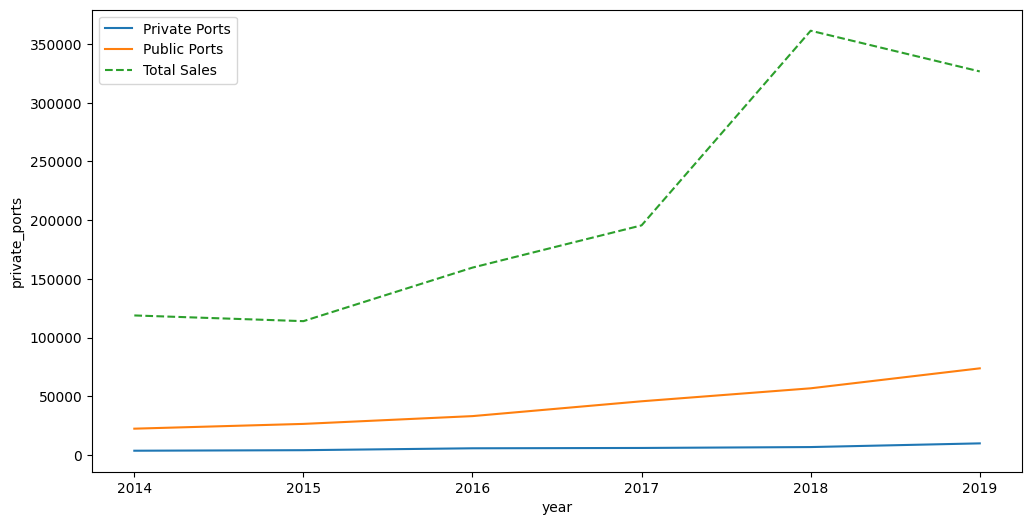

In [10]:
# plotting the data
fig, ax = plt.subplots(figsize = (12,6))

sns.lineplot(data=df_final, x='year', y='private_ports', label='Private Ports')
sns.lineplot(data=df_final, x='year', y='public_ports', label='Public Ports')
sns.lineplot(data=df_final, x='year', y='sales', label='Total Sales', linestyle= '--') 

In [11]:
# As seen in the chart above, all three types show positive trends.
trend = 'same'